In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
import importlib
import pca
importlib.reload(pca)

<module 'pca' from '/Users/morikawakaion/Desktop/machine_learning/pca.py'>

In [10]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

from sklearn.decomposition import PCA

Visualisation of the iris dataset using my pca implementation and sklearn.PCA.

In [13]:
iris = load_iris(as_frame=False)


(4, 2)


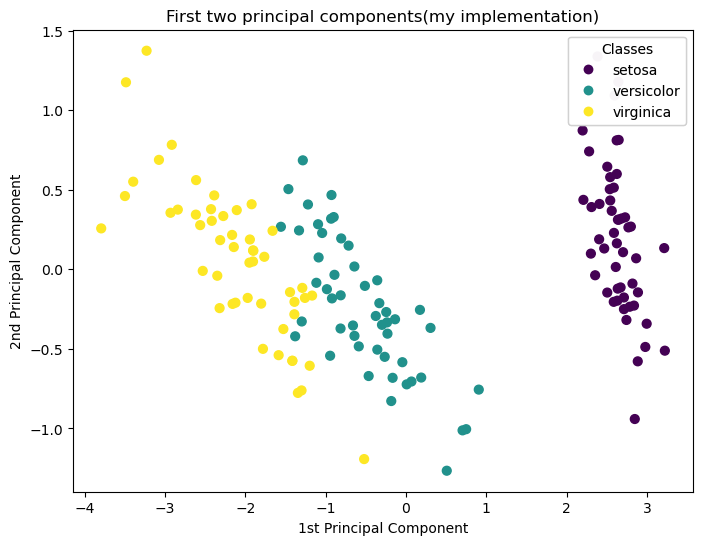

In [37]:
pca_model = pca.PCA(n_components=2)
my_X_reduced = pca_model.fit(iris.data).transform(iris.data)

plt.figure(figsize=(8, 6))

scatter = plt.scatter(
    my_X_reduced[:, 0],
    my_X_reduced[:, 1],
    c=iris.target,
    s=40
)

plt.title("First two principal components(my implementation)")
plt.xlabel("1st Principal Component")
plt.ylabel("2nd Principal Component")

# Add a legend
legend1 = plt.legend(
    scatter.legend_elements()[0],
    iris.target_names.tolist(),
    loc="upper right",
    title="Classes"
)

plt.gca().add_artist(legend1)

plt.show()


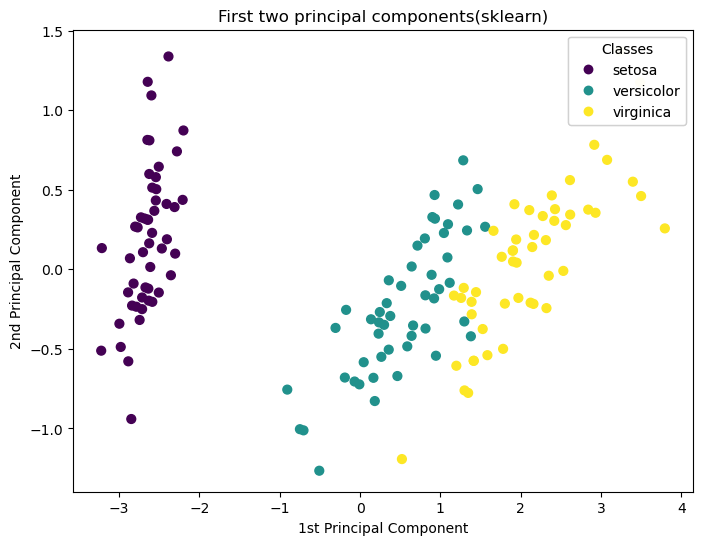

In [47]:
sk_X_reduced = PCA(n_components=2).fit_transform(iris.data)
plt.figure(figsize=(8, 6))


scatter = plt.scatter(
    sk_X_reduced[:, 0],
    sk_X_reduced[:, 1],
    c=iris.target,
    s=40
)

plt.title("First two principal components(sklearn)")
plt.xlabel("1st Principal Component")
plt.ylabel("2nd Principal Component")

# Add a legend
legend1 = plt.legend(
    scatter.legend_elements()[0],
    iris.target_names.tolist(),
    loc="upper right",
    title="Classes"
)

plt.gca().add_artist(legend1)

plt.show()

Here we check if the two results are similar by calculating the 2-norm of the difference of the 2 reduced data matrix. From the figures above, we can see the signs of the 1st principal component are different between my and sklearn's PCA, so we'll flip the sign of the first dimension of sklearn's reduced data

In [48]:

sk_X_reduced[:, 0] *= -1
np.linalg.norm(my_X_reduced - sk_X_reduced, ord=2)


np.float64(1.7177008689798698e-13)

The difference was negligible.